42000
ytrain label    0
Name: 5, dtype: int64


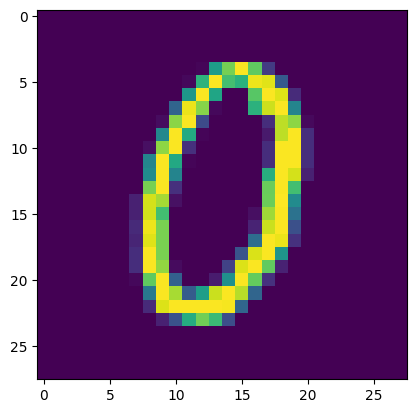

In [1]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# saperating img pixles and lables

# img pixles
xtrain = pd.read_csv("train.csv")
col = xtrain.columns[0]
xtrain = xtrain.drop([col],axis=1)

# lables
ytrain = pd.read_csv('train.csv',usecols=[0])
# train
xtrain
ytrain

# total size
print(len(xtrain))


# chek dogit
n = 5
x = xtrain.loc[n]
y = ytrain.loc[n]
inpt_shape = x.shape
x = np.array(x)
img = x.reshape(28,28)
img = img.astype(np.uint8)
plt.imshow(img)
print(f'ytrain {y}')

In [106]:
# creat and train model
import tensorflow as tf
from tensorflow import keras

# initilizing input shape
x = xtrain.loc[1]
inpt_shape = x.shape


# creating ANN
model_one = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=inpt_shape),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(100,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# # compile 
# model_one.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

# # # backpropagation
# model_one.fit(xtrain,ytrain,batch_size=50,epochs=200)
# loss = model_one.history.history['loss']



Epoch 1/200
840/840 [==============================] - 8s 7ms/step - loss: 1.3935
Epoch 2/200
840/840 [==============================] - 8s 10ms/step - loss: 0.7887
Epoch 3/200
840/840 [==============================] - 8s 10ms/step - loss: 0.7024
Epoch 4/200
840/840 [==============================] - 8s 10ms/step - loss: 0.5881
Epoch 5/200
840/840 [==============================] - 8s 10ms/step - loss: 0.5106
Epoch 6/200
840/840 [==============================] - 8s 10ms/step - loss: 0.4987
Epoch 7/200
840/840 [==============================] - 8s 10ms/step - loss: 0.4554
Epoch 8/200
840/840 [==============================] - 8s 10ms/step - loss: 0.4156
Epoch 9/200
840/840 [==============================] - 8s 10ms/step - loss: 0.4084
Epoch 10/200
840/840 [==============================] - 8s 10ms/step - loss: 0.4054
Epoch 11/200
840/840 [==============================] - 8s 10ms/step - loss: 0.3882
Epoch 12/200
840/840 [==============================] - 8s 10ms/step - loss: 0.3664
Ep

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0678
test loss  0.06777675449848175
INFO:tensorflow:Assets written to: number classifer\assets


INFO:tensorflow:Assets written to: number classifer\assets


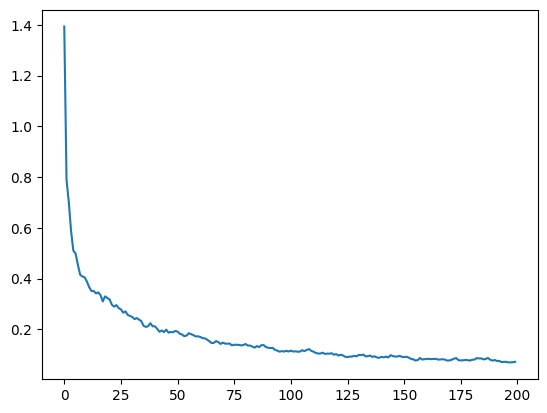

In [107]:
# cheak accuricy
l = model_one.evaluate(xtrain,ytrain)
print(f'test loss  {l}')
# # save model
# model_one.save("number classifer2")
# plt.plot(loss)

label    0
Name: 153, dtype: int64
int64
(784,)
float64
1/1 [==============================] - 0s 450ms/step
[[8.7296522e-01 3.5617502e-06 4.6403150e-04 2.3470825e-04 7.7578170e-06
  1.2200785e-01 3.7426895e-03 8.9248260e-06 4.8005531e-04 8.5158157e-05]]
(array([0], dtype=int64), array([0], dtype=int64))
0.8729652


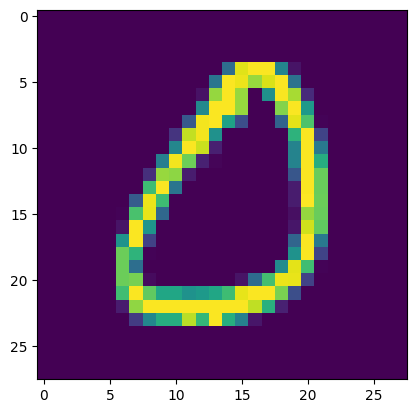

In [2]:
# cheak image 
import tensorflow as tf
n = np.random.randint(1,500)
x = xtrain.loc[n]
y = ytrain.loc[n]
x = np.array(x)
img = x.reshape(28,28)
img = img.astype(np.uint8)
cv.imshow("img",img)
cv.waitKey(0)
cv.destroyAllWindows()


plt.imshow(img)
# cv.imshow("dgt",img)
print(y)
len(xtrain)
print(x.dtype)

# test
# normalize
print(x.shape)
x = tf.keras.utils.normalize(x,axis=0)
print(x.dtype)
# load model
test = tf.keras.models.load_model('number classifer')
# pridict
pred = test.predict(x)

# simplifing output format for softmax
print(pred)
mx = np.max(pred)
outpt = np.where(pred == mx)
print(outpt)
pred = pred.reshape(-1)
print(max(pred))